# Our Business Problem
#### The Universal bank has recently trialed a marketing campaign to sell their new Securities account product to existing customers. They contacted 5000 of their non-Securities account customers with an offer. The data provided in universal.csv is the result of this market test. 

# UniversalBANK Data Preparation (Target = Securities account)

In this notebook we focus on the data loading, basic exploring, and prepatation.

 We will be using the input dataset and build predictive models using Logistic regression, SVM & decision trees. Our target is securities Account which is a binary column.

Our models will predict whether the predict whether the customers will be willing to purchase the new securities account and also calculate how precise our model will be in predicting the outcome.

## 1.0 Setup


In [1]:
# import numpy and pandas libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.impute import SimpleImputer
# set random seed to ensure that results are repeatable
np.random.seed(1)

## 2.0 Load data 

In [2]:
# load data
unibank = pd.read_csv("./UniversalBank.csv")

unibank.head(3)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0


## 3.0 Conduct initial exploration of the data

We have a number of input variables and one target variable. For this analysis, the target variable is Securities Account.

First, our initial exploration of the data should answer the following questions:
1. How many rows and columns
2. How much of a problem do we have with na's?
3. What types of data are there?
4. What types of data are stored in columns
    1. identify which variables are numeric and may need to be standardized later
    2. identify which variables are categorical and may need to be transformed using and encoders such as one-hot-encoder.
5. Identify errors in the data - this is a common problem with categorical vars where the category is mispelled or spelled differently in some instances.
 

In [3]:
# look at the data
unibank.head(10) # note that we don't want to dump all the data to the screen

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.4,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.5,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.3,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.6,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.9,3,0,1,0,0,0,0


#### The data dictionary gives us background about what the data columns indicate
Id: Customer ID
Age: Customers age in completed years  
Experience: Number of years of professional experience  
Income: Annual income of the customer   
Family Size: Family size of the customer  
CCAvg: Average spending on credit cards per month  
Education: Education Level. 1: Undergrad; 2: Graduate; 3:Advanced/Professional  
Mortgage: Value of house mortgage if any 
Personal Loan: (1 if customer has personal loand with bank, 0 otherwise)
Securities Account: (1 if customer has securities account with bank, 0 otherwise)  
CD Account: (1 if customer has certificate of deposit (CD) account with bank, 0 otherwise)  
Online Banking: (1 if customer uses Internet banking facilities, 0 otherwise)  
Credit Card: (1 if customer uses credit card issued by Universal Bank, 0 otherwise) 

In [4]:
# generate a basic summary of the data
unibank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### We can observe that we have no null values in our dataset, and most of the columns are integer in type

In [5]:
# generate a statistical summary of the numeric value in the data
unibank.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [6]:
# Check the missing values by summing the total na's for each variable
unibank.isna().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

### Summary the findings from our initial evaluation of the data

* We have 0 categorical variables
* None of the variables that have missing values


## 4.0 Process the data

* Conduct any data prepartion that should be done *BEFORE* the data split.
* Split the data.
* Conduct any data preparation that should be done *AFTER* the data split.

### 4.1  Conduct any data prepartion that should be done *BEFORE* the data split

Tasks at this stage include:
1. Drop any columns/features 
2. Decide if you with to exclude any observations (rows) due to missing na's.
2. Conduct proper encoding of categorical variables
    1. We can transform them using dummy variable encoding, one-hot-encoding, or label encoding. 

### Since we dont have any null nor categorical variables we just follow step 1

#### Drop any columns/variables we will not be using
We are going to drop ZIP code, ID columns as they wont play an effective role in predicting our target variable

In [7]:

#  We need to drop ZIP, ID
unibank.drop(['ZIP Code', 'ID'], axis=1, inplace = True) 

#### Drop observations with too many NA's
We dont have any null values in our data set, hence we dont need to drop any rows nor columns

#### Encode our categorical variables; Since we dont have any categorical variables this step is also not necessary for us

In [8]:
# explore the dataframe columns to verify encoding and dropped columns
unibank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


### Save the pre-split processed data to a csv file

In [9]:
unibank.to_csv('unibank_presplit_processed.csv', index=False)

### 4.2 Split data (train/test)
##### 70% for training and 30% for testing

In [10]:
# split the data into validation and training set
train_df, test_df = train_test_split(unibank, test_size=0.3)

# to reduce repetition in later code, create variables to represent the columns
# that are our predictors and target
target = 'Securities Account'
predictors = list(unibank.columns)
predictors.remove(target)

#### We have divided the columns into predictors and target which helps us in further part of data analysis

In [11]:
predictors

['Age',
 'Experience',
 'Income',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Personal Loan',
 'CD Account',
 'Online',
 'CreditCard']

### 4.3  Conduct any data prepartion that should be done *AFTER* the data split

We will look at the following:
1) imput any missing numeric values using the mean of the variable/column
2) remove differences of scale by standardizing the numerica variables

We can see from the code above, we dont have any missing values

#### Standardize numeric values

Now, let's create a common scale between the numberic columns by standardizing each numeric column

In [12]:
# create a standard scaler and fit it to the training set of predictors
scaler = preprocessing.StandardScaler()
cols_to_stdize = predictors           
               
# Transform the predictors of training and validation sets
train_df[cols_to_stdize] = scaler.fit_transform(train_df[cols_to_stdize]) # train_predictors is not a numpy array


test_df[cols_to_stdize] = scaler.transform(test_df[cols_to_stdize]) # validation_target is now a series object


In [13]:
train_df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
1334,0.135977,0.156137,-0.837058,-0.344955,-0.365708,-1.055713,-0.557707,-0.323186,0,-0.258356,0.831648,-0.650648
4768,-0.646212,-0.538578,-0.750406,-1.217944,0.037876,0.135453,-0.557707,-0.323186,0,-0.258356,0.831648,-0.650648
65,1.178895,1.285050,1.242590,-1.217944,1.075664,-1.055713,-0.557707,-0.323186,0,-0.258356,0.831648,1.536929
177,-1.428400,-1.493812,-0.187168,1.401022,-0.077434,0.135453,1.869923,-0.323186,0,-0.258356,-1.202432,-0.650648
4489,-0.559302,-0.625418,-1.140340,0.528033,-0.999912,0.135453,-0.557707,-0.323186,0,-0.258356,0.831648,-0.650648
...,...,...,...,...,...,...,...,...,...,...,...,...
2895,1.265805,1.371889,-0.750406,1.401022,-0.365708,0.135453,0.835195,-0.323186,0,-0.258356,0.831648,-0.650648
2763,0.831255,0.937692,-1.313644,1.401022,-0.711638,-1.055713,-0.557707,-0.323186,0,-0.258356,0.831648,-0.650648
905,0.049067,0.156137,-0.988699,-1.217944,-0.538673,-1.055713,0.278035,-0.323186,0,-0.258356,0.831648,1.536929
3980,0.049067,0.156137,0.332744,1.401022,-0.308053,0.135453,-0.557707,-0.323186,0,-0.258356,0.831648,-0.650648


### scaling helps us standardise our dataset & Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise standardized is usually used prior to model fitting.

In [14]:
unibank['Securities Account'].unique()

array([1, 0], dtype=int64)

In [15]:
example1 = unibank[unibank['Securities Account'] == 0]
len(example1)

4478

## Analysis of target
from our dataset we can find out that for our target column 1 if customer has securities account with bank and 0 otherwise

#### We have 4478 rows where our target is 0; which indicates the people without securities account

### Saving our data into train and test splits inorder to read directly from a csv file for next time

In [16]:
train_X = train_df[predictors]
train_y = train_df[target] # train_target is now a series objecttrain_df.to_csv('airbnb_train_df.csv', index=False)
test_X = test_df[predictors]
test_y = test_df[target] # validation_target is now a series object

train_df.to_csv('./unibank_train_df_sa.csv', index=False)
train_X.to_csv('./unibank_train_X_sa.csv', index=False)
train_y.to_csv('./unibank_train_y_sa.csv', index=False)
test_df.to_csv('./unibank_test_df_sa.csv', index=False)
test_X.to_csv('./unibank_test_X_sa.csv', index=False)
test_y.to_csv('./unibank_test_y_sa.csv', index=False)

#### Loading the test & train data that we previously saved

In [17]:
X_train = pd.read_csv("./unibank_train_X_sa.csv")
X_test = pd.read_csv("./unibank_test_X_sa.csv")
y_train = pd.read_csv("./unibank_train_y_sa.csv")
y_test = pd.read_csv("./unibank_test_y_sa.csv")

## 3. Model the data

First, we will create a dataframe to hold all the results of our models.

In [18]:
performance = pd.DataFrame({"model": [], "Accuracy": [], "Precision": [], "Recall": [], "F1": []})

# METRICS
We have used Precision as our metric for analysis as Precision is a measure of the accuracy of a classification model. It represents the proportion of true positive predictions (i.e., the number of correct positive predictions divided by the total number of positive predictions).
Precision is an important metric to consider when the cost of a false positive prediction is high. 

# Logistic Regression Model

Logistic Regression is a statistical model used to analyze the relationship between a dependent variable (also known as the target or outcome variable) and one or more independent variables (also known as predictors or features).
Regularization is a technique used to prevent overfitting in statistical models, such as logistic regression. Overfitting occurs when a model is too complex and fits the training data too closely, leading to poor performance on new data.

In [19]:
# Common imports
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC

np.random.seed(1)


In [20]:
log_reg_model = LogisticRegression(max_iter=900, penalty= 'none')
_ = log_reg_model.fit(X_train, np.ravel(y_train))

In [21]:
model_preds = log_reg_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"default logistic", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

,model,Accuracy,Precision,Recall,F1
0,default logistic,0.902,0.578947,0.211538,0.309859


### 3.2 Change to liblinear solver

In [22]:
log_reg_liblin_model = LogisticRegression(solver='liblinear').fit(X_train, np.ravel(y_train))

In [23]:
model_preds = log_reg_liblin_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"liblinear logistic", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

,model,Accuracy,Precision,Recall,F1
0,default logistic,0.902,0.578947,0.211538,0.309859
0,liblinear logistic,0.902,0.578947,0.211538,0.309859


### 3.3 L2 Regularization

In [24]:
log_reg_L2_model = LogisticRegression(penalty='l2', max_iter=1000)
_ = log_reg_L2_model.fit(X_train, np.ravel(y_train))

In [25]:
model_preds = log_reg_L2_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"L2 logistic", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

,model,Accuracy,Precision,Recall,F1
0,default logistic,0.902,0.578947,0.211538,0.309859
0,liblinear logistic,0.902,0.578947,0.211538,0.309859
0,L2 logistic,0.902,0.578947,0.211538,0.309859


### 3.4 L1 Regularization

In [26]:
log_reg_L1_model = LogisticRegression(solver='liblinear', penalty='l1')
_ = log_reg_L1_model.fit(X_train, np.ravel(y_train))

In [27]:
model_preds = log_reg_L1_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"L1 logistic", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])
performance

,model,Accuracy,Precision,Recall,F1
0,default logistic,0.902000,0.578947,0.211538,0.309859
0,liblinear logistic,0.902000,0.578947,0.211538,0.309859
0,L2 logistic,0.902000,0.578947,0.211538,0.309859
0,L1 logistic,0.900667,0.561404,0.205128,0.300469


3.5 Elastic Net Regularization

In [28]:
log_reg_elastic_model = LogisticRegression(solver='saga', penalty='elasticnet', l1_ratio=0.5, max_iter=1000)
_ = log_reg_elastic_model.fit(X_train, np.ravel(y_train))

In [29]:
model_preds = log_reg_elastic_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance = pd.concat([performance, pd.DataFrame({'model':"Elastic logistic", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])

## 5.0 Summary

Sorted by Precision, the best models are:

In [30]:
performance.sort_values(by=['Precision'])

,model,Accuracy,Precision,Recall,F1
0,L1 logistic,0.900667,0.561404,0.205128,0.300469
0,default logistic,0.902000,0.578947,0.211538,0.309859
0,liblinear logistic,0.902000,0.578947,0.211538,0.309859
0,L2 logistic,0.902000,0.578947,0.211538,0.309859
0,Elastic logistic,0.902000,0.578947,0.211538,0.309859


Based on the above results, All logistic model performs better amoung all the models , this is a close call as all of the model produce close results. L2,elastic liblinear produce identital results

### 3.1 Fit a SVM classification model using linear kernal

A SVM model classifies the data into planes and seggregates the data into classes.SVM works by finding the hyperplane in a high-dimensional space that maximally separates the data points of different classes.kernel function allows SVM to project the data into a higher-dimensional space where it becomes linearly separable.

There are several popular types of kernel functions that can be used with SVM, such as: Linear kernel,Polynomial kernel,Radial Basis Function (RBF) kernel.

SVM has several advantages over other machine learning algorithms.

In [31]:
from sklearn.svm import SVC
svm_lin_model = SVC(kernel="linear")
_ = svm_lin_model.fit(X_train, np.ravel(y_train))

In [32]:
model_preds = svm_lin_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance= pd.concat([performance, pd.DataFrame({'model':"linear svm", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])

### 3.2 Fit a SVM classification model using rbf kernal

In [33]:
svm_rbf_model = SVC(kernel="rbf", C=10, gamma='scale')
_ = svm_rbf_model.fit(X_train, np.ravel(y_train))

In [34]:
model_preds = svm_rbf_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance= pd.concat([performance, pd.DataFrame({'model':"rbf svm", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])

### 3.3 Fit a SVM classification model using polynomial kernal

In [35]:
svm_poly_model = SVC(kernel="poly", degree=3, coef0=1, C=10)
_ = svm_poly_model.fit(X_train, np.ravel(y_train))

In [36]:
model_preds = svm_poly_model.predict(X_test)
c_matrix = confusion_matrix(y_test, model_preds)
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
performance= pd.concat([performance, pd.DataFrame({'model':"poly svm", 
                                                    'Accuracy': [(TP+TN)/(TP+TN+FP+FN)], 
                                                    'Precision': [TP/(TP+FP)], 
                                                    'Recall': [TP/(TP+FN)], 
                                                    'F1': [2*TP/(2*TP+FP+FN)]
                                                     }, index=[0])])

In [37]:

performance.sort_values(by=['Precision'],ascending= False)

,model,Accuracy,Precision,Recall,F1
0,poly svm,0.901333,0.605263,0.147436,0.237113
0,default logistic,0.902000,0.578947,0.211538,0.309859
0,liblinear logistic,0.902000,0.578947,0.211538,0.309859
0,L2 logistic,0.902000,0.578947,0.211538,0.309859
0,Elastic logistic,0.902000,0.578947,0.211538,0.309859
0,rbf svm,0.899333,0.567568,0.134615,0.217617
0,L1 logistic,0.900667,0.561404,0.205128,0.300469
0,linear svm,0.897333,0.521739,0.153846,0.237624


### Results
From the results above we can see that poly SVM has the highest precision

In [38]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV


### In this next section, GridSearch will use K Fold Cross Validation 

K-Fold cross validation is used to avoid overfitting. 

In k-fold cross-validation, the original sample is randomly partitioned into k equal sized subsamples. Of the k subsamples, a single subsample is retained as the validation data for testing the model, and the remaining k − 1 subsamples are used as training data. The cross-validation process is then repeated k times, with each of the k subsamples used exactly once as the validation data. The k results can then be averaged to produce a single estimation. 

![cross validation diagram](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)


### Model the data

Conduct an initial random search across a wide range of possible parameters.

In [58]:
score_measure = "precision"
kfolds = 5

param_grid = {
    'min_samples_split': np.arange(1,100),  
    'min_samples_leaf': np.arange(1,100),
    'min_impurity_decrease': np.arange(0.0001, 0.01, 0.0005),
    'max_leaf_nodes': np.arange(5, 100), 
    'max_depth': np.arange(1,50), 
    'criterion': ['entropy', 'gini'],
}


In [59]:

dtree = DecisionTreeClassifier()
rand_search = RandomizedSearchCV(estimator = dtree, param_distributions=param_grid, cv=kfolds, n_iter=300,
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)


In [60]:

_ = rand_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {rand_search.best_score_}")
print(f"... with parameters: {rand_search.best_params_}")

bestRecallTree = rand_search.best_estimator_

Fitting 5 folds for each of 300 candidates, totalling 1500 fits
The best precision score is 0.6772256728778469
... with parameters: {'min_samples_split': 41, 'min_samples_leaf': 16, 'min_impurity_decrease': 0.0006000000000000001, 'max_leaf_nodes': 11, 'max_depth': 26, 'criterion': 'gini'}


C:\Users\Bhargav Lakkireddy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
5 fits failed out of a total of 1500.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Bhargav Lakkireddy\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Bhargav Lakkireddy\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 937, in fit
    super().fit(
  File "C:\Users\Bhargav Lakkireddy\anaconda3\lib\site-packages\sklearn\tree\_classes.py", line 250, in fit
    raise ValueError(
ValueError: min_samples_split

In [61]:
c_matrix = confusion_matrix(y_test, rand_search.predict(X_test))
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
print(f"Accuracy={(TP+TN)/(TP+TN+FP+FN):.7f} Precision={TP/(TP+FP):.7f} Recall={TP/(TP+FN):.7f} F1={2*TP/(2*TP+FP+FN):.7f}")

Accuracy=0.9000000 Precision=0.5750000 Recall=0.1474359 F1=0.2346939


Conduct an exhaustive search across a smaller range of parameters around the parameters found in the initial random search.

### Based on above resulted values we change our new parameters for our gridsearch

In [62]:
score_measure = "precision"
kfolds = 5

param_grid = {
    'min_samples_split': np.arange(40,44),  
    'min_samples_leaf': np.arange(10,16),
    'min_impurity_decrease': np.arange(0.0001, 0.001,0.0005),
    'max_leaf_nodes': np.arange(60,70), 
    'max_depth': np.arange(15,20), 
    'criterion': ['entropy'],
}

dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid=param_grid, cv=kfolds, 
                           scoring=score_measure, verbose=1, n_jobs=-1,  # n_jobs=-1 will utilize all available CPUs 
                           return_train_score=True)

_ = grid_search.fit(X_train, y_train)

print(f"The best {score_measure} score is {grid_search.best_score_}")
print(f"... with parameters: {grid_search.best_params_}")

bestRecallTree = grid_search.best_estimator_

Fitting 5 folds for each of 2400 candidates, totalling 12000 fits
The best precision score is 0.6837458193979933
... with parameters: {'criterion': 'entropy', 'max_depth': 15, 'max_leaf_nodes': 60, 'min_impurity_decrease': 0.0001, 'min_samples_leaf': 10, 'min_samples_split': 43}


In [63]:
c_matrix = confusion_matrix(y_test, grid_search.predict(X_test))
TP = c_matrix[1][1]
TN = c_matrix[0][0]
FP = c_matrix[0][1]
FN = c_matrix[1][0]
print(f"Accuracy={(TP+TN)/(TP+TN+FP+FN):.7f} Precision={TP/(TP+FP):.7f} Recall={TP/(TP+FN):.7f} F1={2*TP/(2*TP+FP+FN):.7f}")

Accuracy=0.9013333 Precision=0.6428571 Recall=0.1153846 F1=0.1956522


### The precision for Grid Search is 0.642, which is better compared to SVM model

## 5.0 Importance of features

In [64]:
np.round(grid_search.best_estimator_.feature_importances_,2)

array([0.05, 0.06, 0.13, 0.01, 0.08, 0.01, 0.09, 0.05, 0.34, 0.09, 0.08])

## 6.0 Diagrams of DTrees

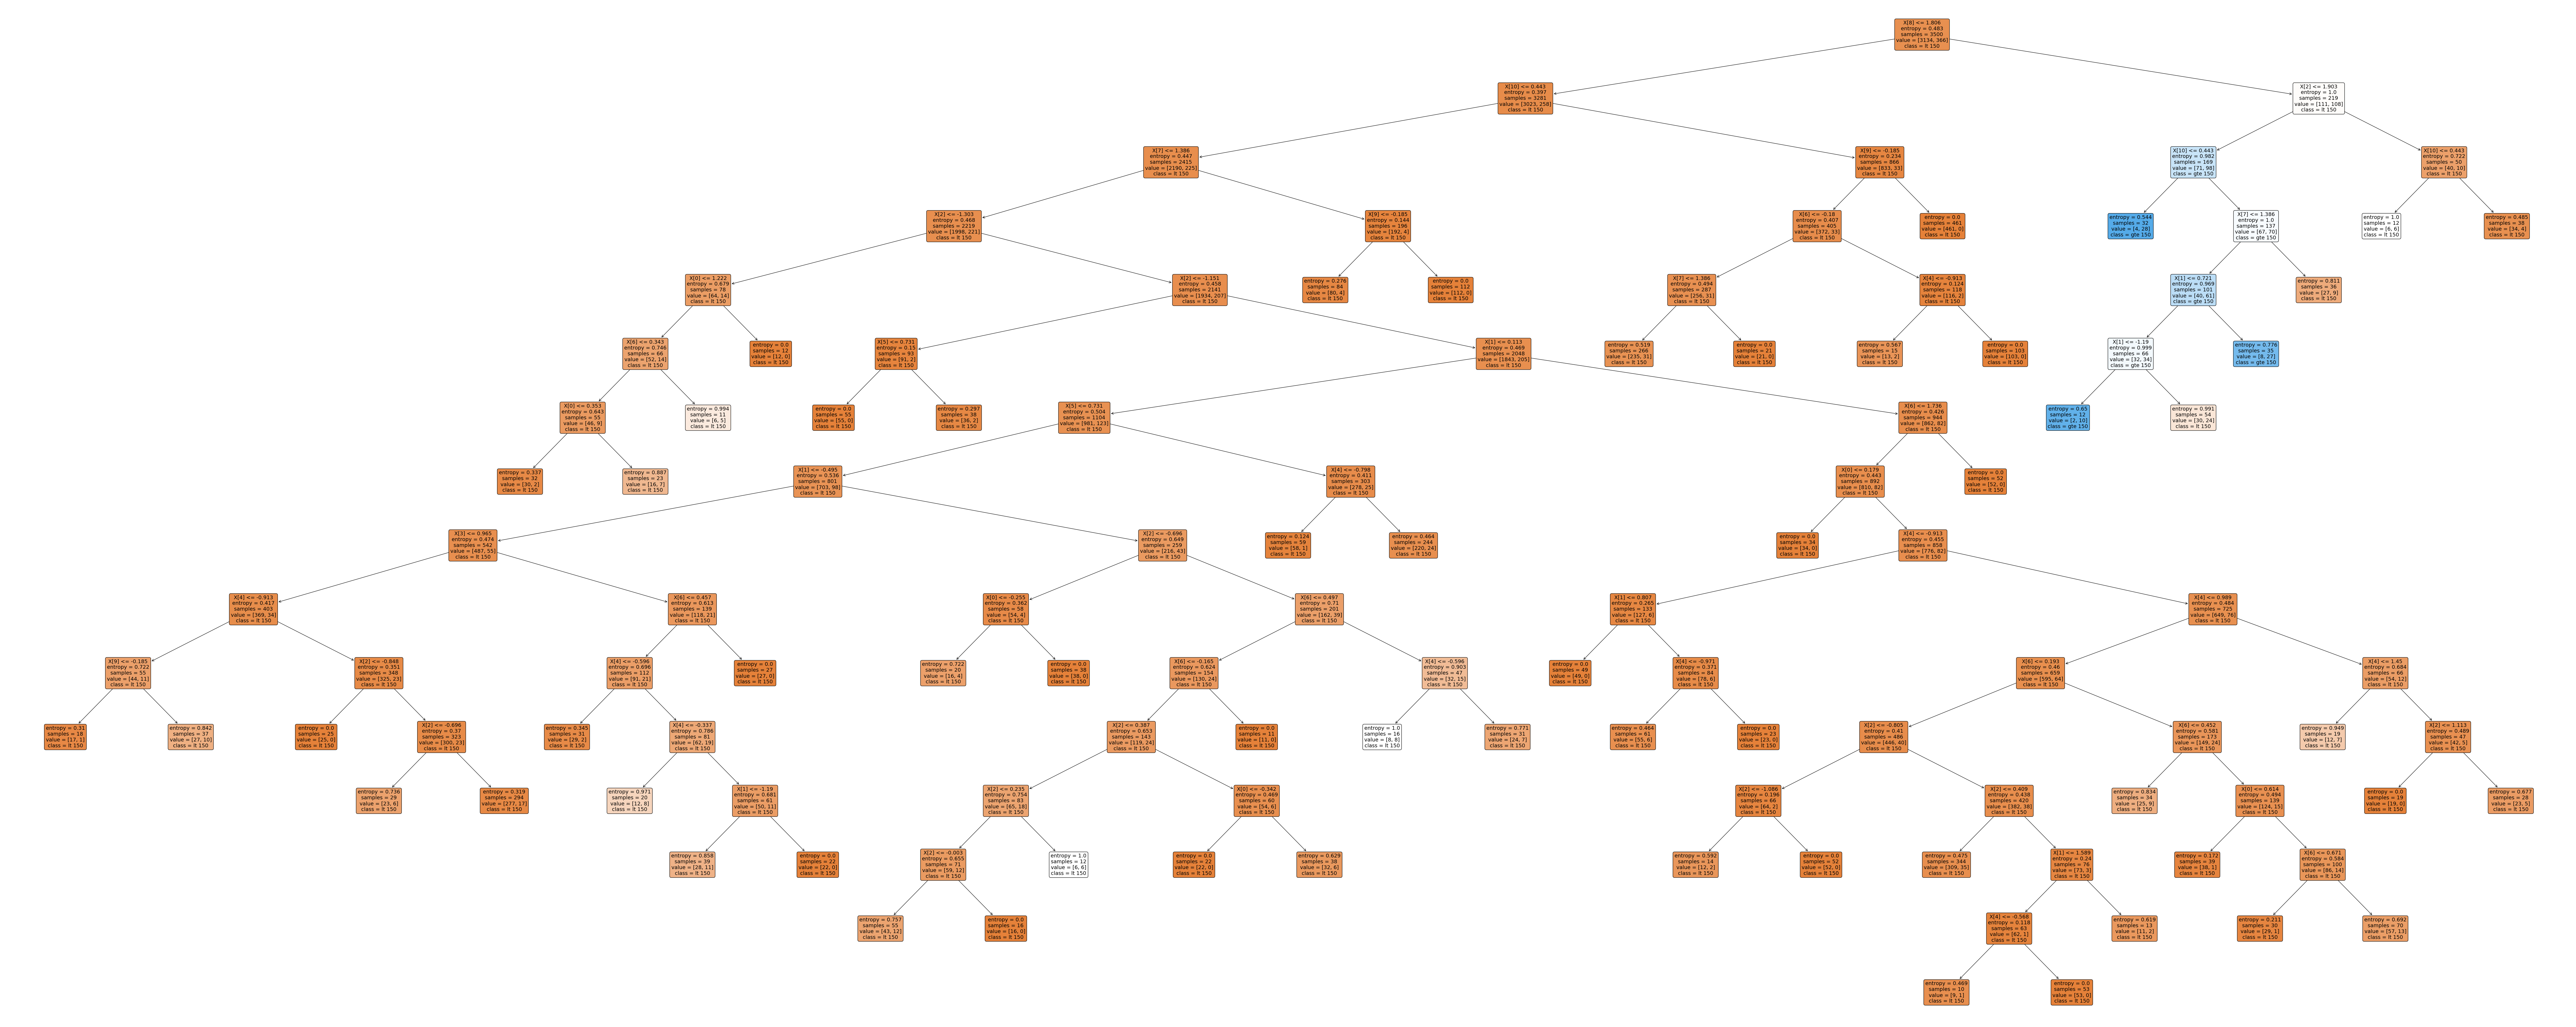

In [65]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(125,50))
tree = plot_tree(grid_search.best_estimator_, 
              #feature_names=train_inputs.columns.values, # our feature names are stripped from the data set
              class_names=['lt 150', 'gte 150'], 
              filled=True, 
              rounded=True, 
              fontsize=14)

## Discussion


The performance of Support Vector Machine (SVM) models versus Decision Trees depends on several factors, including the data complexity, the problem being addressed, and the hyperparameters used in the models. SVM models tend to perform well when the data is complex and the decision boundary is nonlinear, while Decision Trees can be effective when the data is simpler and the decision boundary is more easily separable. Decision Trees are also more interpretable than SVMs. Ultimately, the choice between the two models will depend on the specific problem at hand, as well as other considerations such as model complexity, training time, and interpretability. It is usually recommended to try both models and compare their performance before selecting the one that works best for a given problem.

#### From our results, our decision tree model performed better for the data, this helps the bank to sell the new securities to the existing customers and how precise they will be able to sell.


 By considering precision we should prioritize the accuracy of a model's positive predictions over other metrics. Precision is a measure of how many true positive predictions the model makes compared to the total number of positive predictions. By focusing on precision, the goal is to minimize the number of false positives even if this means sacrificing some true positives. This approach can be useful in applications where false positives can have serious consequences, such as in medical diagnosis or fraud detection.